In [3]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("qingyi/wm811k-wafer-map")

print("Path to dataset files:", path)

/Users/advaittahilyani/anaconda3/envs/waferDetection/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/Users/advaittahilyani/anaconda3/envs/waferDetection/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|████████████████████████████████████████| 149M/149M [00:03<00:00, 40.2MB/s]

Extracting files...


Path to dataset files: /Users/advaittahilyani/.cache/kagglehub/datasets/qingyi/wm811k-wafer-map/versions/1


In [7]:
import pandas as pd

dataset_path = "/Users/advaittahilyani/.cache/kagglehub/datasets/qingyi/wm811k-wafer-map/versions/1/LSWMD.pkl"

df = pd.read_pickle(dataset_path)

print(df.head())
print(df.columns)


                                            waferMap  dieSize lotName  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0    lot1   

   waferIndex trianTestLabel failureType  
0         1.0   [[Training]]    [[none]]  
1         2.0   [[Training]]    [[none]]  
2         3.0   [[Training]]    [[none]]  
3         4.0   [[Training]]    [[none]]  
4         5.0   [[Training]]    [[none]]  
Index(['waferMap', 'dieSize', 'lotName', 'waferIndex', 'trianTestLabel',
       'failureType'],
      dtype='object')


In [14]:
def clean_failure(x):
    # If it's a list of lists e.g. [[none]]
    if isinstance(x, list):
        if len(x) > 0:
            if isinstance(x[0], list) and len(x[0]) > 0:
                return str(x[0][0])
            return str(x[0])
        return "none"   # empty list
    # If it's already a string
    if isinstance(x, str):
        return x
    # If it's something else (numpy array, None, etc.)
    try:
        return str(x.item())   # scalar numpy
    except Exception:
        return "none"

# Apply cleaning
df['failureType'] = df['failureType'].apply(clean_failure)

# Now they are plain strings → safe to filter
df_labeled = df[df['failureType'] != "none"]

print("Total wafers:", len(df))
print("Labeled wafers:", len(df_labeled))
print("Unique failure types:", df_labeled['failureType'].unique())

Total wafers: 811457
Labeled wafers: 25519
Unique failure types: ['Loc' 'Edge-Loc' 'Center' 'Edge-Ring' 'Scratch' 'Random' 'Near-full'
 'Donut']


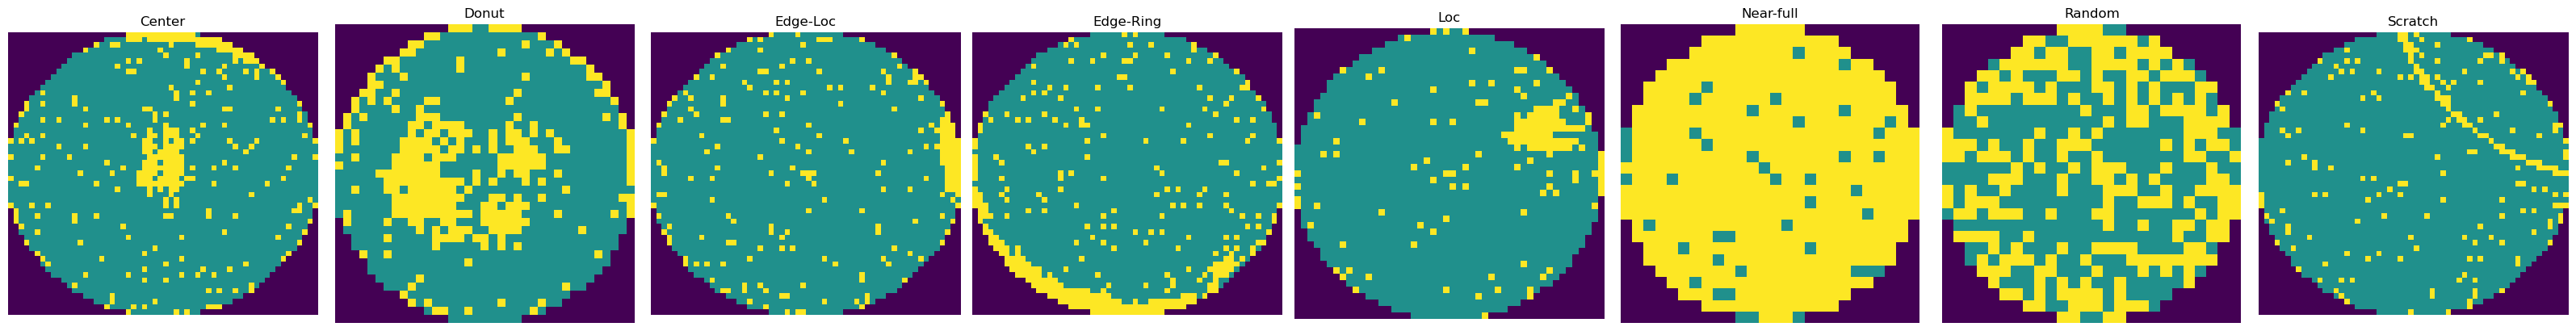

In [16]:
import matplotlib.pyplot as plt
examples = df_labeled.groupby('failureType').first()

n = len(examples)
fig, axes = plt.subplots(1, n, figsize=(4*n, 4))

if n == 1:
    axes = [axes]

for ax, (ftype, row) in zip(axes, examples.iterrows()):
    wafer_map = row['waferMap']
    ax.imshow(wafer_map, cmap="viridis", interpolation="none")
    ax.set_title(ftype)
    ax.axis("off")

plt.tight_layout()
plt.show()